
**VENTA DE CASAS EN CHILE**

1. El presente DataFrame, contiene el comportamiento de las ventas de casas en la region Metroplitana de Chile, este nos entrega los valores en Dolares, Moneda local (CLP) y Valores con ajuste de Moneda local (Price UF).

2. Esta nos permitira dilucidar cuales son las comunas en las cuales se encuentra el mayor numero de ofertas en el mercado inmobiliario actual y como este se compone, desde la cantidad de habitaciones, baño, areas contruidas y totales de la viieda, mas la cantidad de estacionamentos u ocupacion de automoviles cuenta las propiedades de la región.

3. El dataset fue obtenido de [Kaggle](https://www.kaggle.com/datasets/luisfelipetn/valor-casas-usadas-chile-rm-08032023/data). Entregandonos datos reales publicados en [ChilePropiedades](https://chilepropiedades.cl/).

 **Diccionario de datos "Variables"**

* Price_CLP: Precio de Moneda local *(Pesos Chilenos)*.

* Price_UF:	Precio asigancion de Ajuste de Moneda Nacional.

* Price_USD: Precio en dolares.

* Comuna: Localidad de la Region Metropolitana de Santiago de Chile.

* Ubicacion: Dirección en la cual se encuentra la Propiedad.

* Dorms: Cantiad de Dormitorios de la Propiedad.

* Baths: Cantidad de Baños de la Propiedad.

* Built Area: Areas Construidas en $M^2$.

* Total Area:Areas Totales de la Propiedad.

* Parking: Estacionamientos en la Propiedad,

* id: ID de Ventas en Sitio WEB,

* Realtor: Corredor de Bienes Raices.


**1.-**  IMPORTACION DE LIBRERIAS
* Las librerias que utilizaremos son las siguientes:
>* Pandas
>* numpy
>* matplotlib.pyplot
>* seaborn
>* matplotlib

In [ ]:
import pandas as pd
import numpdy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


In [ ]:
!ls "/content/drive/My Drive/Proyecto - DataCience/Sales_House_Chile.csv"

'/content/drive/My Drive/Proyecto - DataCience/Sales_House_Chile.csv'


**2.- VISTA DE DATAFRAME CARGADO EN NOTEBOOK**
* El codigo nos muestra los primeros 5 registros de la tabla y como es su composición.


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Proyecto - DataCience/Sales_House_Chile.csv")
df.head()

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
0,129884400,3600.0,158396.0,Lampa,AvenidaLaHacienda,3.0,2.0,68.0,221.0,1.0,7850612,Behouse
1,130000000,3603.0,158537.0,Buin,Villaseca,5.0,3.0,150.0,190.0,2.0,10081485,NaN
2,172998805,4795.0,210974.0,PuenteAlto,BarrioAustria,4.0,3.0,90.0,182.0,3.0,10257247,Bissac
3,135296250,3750.0,164995.0,Buin,ComercianteArmandoPérezCarrasco,3.0,2.0,85.0,175.0,1.0,20153043,Ambiento Propiedades
4,195000000,5405.0,237805.0,QuintaNormal,Hostos,3.0,3.0,130.0,402.0,1.0,16669338,Puntoinmobiliario.cl


**3.- INCORPORACION DE COLUMNA AL DATAFRAME CORRESPONDIENTE A LA PROVINCIA DE LA COMUNA**
* Dataframe se le incorpora el dato de la provicia para hacer analisis respectivos, con la finilidad de determinar de una manera mas resumida la unibicación de las comunas de la Región Metropolitana de Santiago, Chile.
* Nos permitira realizar analisis mas resumidos en función de las comunas alojadas en cada una de las provincias mencionadas


In [ ]:
listado_provincias = {
    'Alhué':'Provincia de Melipilla',           'Buin':'Provincia de Maipo',            'CaleradeTango':'Provincia de Maipo',     'Cerrillos':'Provincia de Santiago',
    'CerroNavia':'Provincia de Santiago',       'Colina':'Provincia de Chacabuco',      'Conchalí':'Provincia de Santiago',       'Curacaví':'Provincia de Melipilla',
    'ElBosque':'Provincia de Santiago',         'ElMonte':'Provincia de Talagante',     'EstaciónCentral':'Provincia de Santiago','Huechuraba':'Provincia de Santiago',
    'Independencia':'Provincia de Santiago',    'IsladeMaipo':'Provincia de Talagante', 'LaCisterna':'Provincia de Santiago',     'LaFlorida':'Provincia de Santiago',
    'LaGranja':'Provincia de Santiago',         'Lampa':'Provincia de Chacabuco',       'LaPintana':'Provincia de Santiago',      'LaReina':'Provincia de Santiago',
    'LasCondes':'Provincia de Santiago',        'LoBarnechea':'Provincia de Santiago',  'LoEspejo':'Provincia de Santiago',       'LoPrado':'Provincia de Santiago',
    'Macul':'Provincia de Santiago',            'Maipú':'Provincia de Santiago',        'MaríaPinto':'Provincia de Melipilla',    'Melipilla':'Provincia de Melipilla',
    'Ñuñoa':'Provincia de Santiago',            'PadreHurtado':'Provincia de Talagante','Paine':'Provincia de Maipo',             'PedroAguirreCerda':'Provincia de Santiago',
    'Peñaflor':'Provincia de Talagante',        'Peñalolén':'Provincia de Santiago',    'Pirque':'Provincia de Cordillera',       'Providencia':'Provincia de Santiago',
    'Pudahuel':'Provincia de Santiago',         'PuenteAlto':'Provincia de Cordillera', 'Quilicura':'Provincia de Santiago',      'QuintaNormal':'Provincia de Santiago',
    'Recoleta':'Provincia de Santiago',         'Renca':'Provincia de Santiago',        'SanBernardo':'Provincia de Maipo',       'SanJoaquín':'Provincia de Santiago',
    'SanJosédeMaipo':'Provincia de Cordillera', 'SanMiguel':'Provincia de Santiago',    'SanPedro':'Provincia de Melipilla',      'SanRamón':'Provincia de Santiago',
    'Santiago':'Provincia de Santiago',         'Talagante':'Provincia de Talagante',   'Tiltil':'Provincia de Chacabuco',        'Vitacura':'Provincia de Santiago'
}
df['Provincia'] = df['Comuna'].map(listado_provincias)

**AJUSTE DE COLUMNAS DORMS, BATHS, Built Area, TOTAL AREA Y PARKING**
* Los valores ajustados corresponden a que estos muestran decimal, de esta forma estamos regularizando el dataframe para que nos puestr valores enteros o float, lo cual revisaremos mas adelante en la ejecucion de nueva linea de codigo.

In [ ]:
columnas_a_redondear = ['Dorms', 'Baths', 'Built Area', 'Total Area', 'Parking']
df[columnas_a_redondear] = df[columnas_a_redondear].round(2)

In [ ]:
df.head()

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor,Provincia
0,129884400,3600.0,158396.0,Lampa,AvenidaLaHacienda,3.0,2.0,68.0,221.0,1.0,7850612,Behouse,Provincia de Chacabuco
1,130000000,3603.0,158537.0,Buin,Villaseca,5.0,3.0,150.0,190.0,2.0,10081485,NaN,Provincia de Maipo
2,172998805,4795.0,210974.0,PuenteAlto,BarrioAustria,4.0,3.0,90.0,182.0,3.0,10257247,Bissac,Provincia de Cordillera
3,135296250,3750.0,164995.0,Buin,ComercianteArmandoPérezCarrasco,3.0,2.0,85.0,175.0,1.0,20153043,Ambiento Propiedades,Provincia de Maipo
4,195000000,5405.0,237805.0,QuintaNormal,Hostos,3.0,3.0,130.0,402.0,1.0,16669338,Puntoinmobiliario.cl,Provincia de Santiago


**4.- FORMATO COLUMNA PRICE_CLP**
* Al considerar que el monto se encuentra en moneda nacional (Chile), este dato al realizar la sumatoria queda con hexadecimal, es por esto que se formatea campo, quedanto este en "Miles" *(Division realizada en Mil)*

In [ ]:
df['Price_CLP'] = df['Price_CLP'] / 1000
df.describe().round(2)

,Price_CLP,Price_UF,Price_USD,Dorms,Baths,Built Area,Total Area,Parking,id
count,9291.00,9291.00,9291.00,9202.00,9138.00,9013.00,9057.00,6371.00,9291.00
mean,392513.38,10879.28,478674.86,4.03,2.75,6091.60,890.98,2.68,14111574.63
std,403651.50,11187.99,492257.92,1.66,1.48,527436.68,11291.40,2.22,4187239.01
min,37000.00,1026.00,45122.00,1.00,1.00,1.00,1.00,1.00,1213620.00
25%,128206.73,3553.50,156350.00,3.00,2.00,90.00,134.00,1.00,11087459.00
50%,234513.50,6500.00,285992.00,4.00,3.00,131.00,230.00,2.00,14436826.00
75%,526753.40,14600.00,642382.00,5.00,3.00,209.00,480.00,3.00,17844280.00
max,4870665.00,135000.00,5939835.00,35.00,29.00,50000000.00,720000.00,26.00,20161463.00


In [ ]:
df['Price_USD'] = df['Price_USD'] / 1000
df.describe().round(2)

,Price_CLP,Price_UF,Price_USD,Dorms,Baths,Built Area,Total Area,Parking,id
count,9291.00,9291.00,9291.00,9202.00,9138.00,9013.00,9057.00,6371.00,9291.00
mean,392513.38,10879.28,478.67,4.03,2.75,6091.60,890.98,2.68,14111574.63
std,403651.50,11187.99,492.26,1.66,1.48,527436.68,11291.40,2.22,4187239.01
min,37000.00,1026.00,45.12,1.00,1.00,1.00,1.00,1.00,1213620.00
25%,128206.73,3553.50,156.35,3.00,2.00,90.00,134.00,1.00,11087459.00
50%,234513.50,6500.00,285.99,4.00,3.00,131.00,230.00,2.00,14436826.00
75%,526753.40,14600.00,642.38,5.00,3.00,209.00,480.00,3.00,17844280.00
max,4870665.00,135000.00,5939.84,35.00,29.00,50000000.00,720000.00,26.00,20161463.00


**5.- REVISION LOS TIPOS DE DATOS**
* Vista preliminar de como se encuentran los datos en el dataframe.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   9291 non-null   float64
 1   Price_UF    9291 non-null   float64
 2   Price_USD   9291 non-null   float64
 3   Comuna      9291 non-null   object 
 4   Ubicacion   9291 non-null   object 
 5   Dorms       9202 non-null   float64
 6   Baths       9138 non-null   float64
 7   Built Area  9013 non-null   float64
 8   Total Area  9057 non-null   float64
 9   Parking     6371 non-null   float64
 10  id          9291 non-null   int64  
 11  Realtor     8125 non-null   object 
 12  Provincia   9291 non-null   object 
dtypes: float64(8), int64(1), object(4)
memory usage: 943.7+ KB


**6.- VISTA DE DATOS QUE SE ENCUENTRAN NULOS O PERDIDOS**
* Podemos visualizar que los campos con datos perdidso son: Dormitorios, Baños, Area Construida, Área Total, Estacionamiento y Corredor de Bienes.

In [ ]:
nulos_por_columna = df.isnull().sum()
print(nulos_por_columna[nulos_por_columna > 0])

Dorms           89
Baths          153
Built Area     278
Total Area     234
Parking       2920
Realtor       1166
dtype: int64


**7.- TOP 15 DEL RANKING CON MAYOR DIPONIBILIDAD**
* Se presenta en la data el ranking de las 15 comunas con mayor disponibilidad para trabajar con un dataset mas acotado.

In [ ]:
conteo_comunas = df['Comuna'].value_counts()
top_15_comunas = conteo_comunas.head(15)
df_top_15 = pd.DataFrame({'Comuna': top_15_comunas.index, 'Cantidad': top_15_comunas.values})
df_top_15['Ranking'] = range(1, len(df_top_15) + 1)
print(df_top_15)


         Comuna  Cantidad  Ranking
0     LasCondes       939        1
1    PuenteAlto       816        2
2         Maipú       738        3
3        Colina       693        4
4   LoBarnechea       577        5
5     LaFlorida       472        6
6     Peñalolén       366        7
7   SanBernardo       356        8
8       LaReina       312        9
9      Santiago       299       10
10     Vitacura       268       11
11        Ñuñoa       262       12
12     Pudahuel       240       13
13    Quilicura       217       14
14        Lampa       201       15


**8.- TOP 15 DE LOS CORREDORES DE BIENES QUE PRESNETAN MAYOR OFERTA EN VIVIENDAS EN EL MERCADO**
* Se muestra el ranking de los 15 corredores que cuentan con la mayor cantidad de ofertas en el mercado inmobiliario.

In [ ]:
conteo_corredor = df['Realtor'].value_counts()
top_15_corredor = conteo_corredor .head(15)
df_top_15 = pd.DataFrame({'Realtor': top_15_corredor.index, 'Cantidad': top_15_corredor.values})
df_top_15['Ranking'] = range(1, len(df_top_15) + 1)
print(df_top_15)

                               Realtor  Cantidad  Ranking
0                                 Unne      1019        1
1                               Nexxos       576        2
2                             Easyprop       510        3
3                       Berrios Zegers       395        4
4                Brokers Inmobiliarios       378        5
5                 Corredores Asociados       328        6
6      Propiedades Centro Santiago SPA       291        7
7   Grupo Premium Propiedades Santiago       256        8
8                                 Houm       250        9
9                             Mi Llave       237       10
10                    Todo Propiedades       205       11
11      Movahome Corredores Integrados       157       12
12                  Agente Propiedades       143       13
13                             Urbalia       141       14
14                            Propital       134       15


**9.- REEMPLAZO DE VAROLORES NULOS O PERDIDOS**
* Se utiliza la media por comuna de los valores para cambiar los valores Nulos de Domitorios, Baños, Area Contruida y Area Total, de esta manera limpiamos el DataSet utilizado.


In [ ]:
comuna_means = df.groupby('Comuna').mean(numeric_only=True)
df['Dorms'] = df.apply(lambda x: comuna_means.loc[x['Comuna'], 'Dorms'] if pd.isnull(x['Dorms']) else x['Dorms'], axis=1)
df['Baths'] = df.apply(lambda x: comuna_means.loc[x['Comuna'], 'Baths'] if pd.isnull(x['Baths']) else x['Baths'], axis=1)
df['Built Area'] = df.apply(lambda x: comuna_means.loc[x['Comuna'], 'Built Area'] if pd.isnull(x['Built Area']) else x['Built Area'], axis=1)
df['Total Area'] = df.apply(lambda x: comuna_means.loc[x['Comuna'], 'Total Area'] if pd.isnull(x['Total Area']) else x['Total Area'], axis=1)
missing_values_after = df[['Dorms', 'Baths', 'Built Area', 'Total Area']].isnull().sum()
missing_values_after

,0
Dorms,0
Baths,0
Built Area,0
Total Area,0


**10.- SEPARACION EN DECILES**
* Se separan los precios en dolares en deciles, para contar con referencia de los datos y poder organizarlos de mejor manera.

In [ ]:
df['Tramo_Precio'] = pd.qcut(df['Price_USD'], q=10, labels=[f'Decil {i+1}' for i in range(10)])
tramo_counts = df['Tramo_Precio'].value_counts().sort_index()
resultados = pd.DataFrame({
    'Tramo_Precio': tramo_counts.index,
    'Cantidad_Registros': tramo_counts.values
})
print(resultados)

  Tramo_Precio  Cantidad_Registros
0      Decil 1                 933
1      Decil 2                 967
2      Decil 3                 896
3      Decil 4                 933
4      Decil 5                 922
5      Decil 6                 938
6      Decil 7                 927
7      Decil 8                 930
8      Decil 9                 940
9     Decil 10                 905


**10a.- Agrupacion de deciles**
* Se agregan las cantidades de registros que se encuentran por decil, con la finilidad de evualar los mejores resultados a la hora de hacer analisis del dataframe utiizado

In [ ]:
grouped_data = df.groupby('Tramo_Precio').agg({
    'Price_USD': ['min', 'max', 'mean', 'median']
}).reset_index()
grouped_data[('Price_USD', 'mean')] = grouped_data[('Price_USD', 'mean')].apply(lambda x: f'{x:.5f}')
grouped_data['Tramo_precio'] = resultados['Cantidad_Registros']
print(grouped_data)

  Tramo_Precio Price_USD                                 Tramo_precio
                     min       max        mean    median             
0      Decil 1    45.122   101.197    82.47494    85.366          933
1      Decil 2   101.220   140.244   119.13246   117.257          967
2      Decil 3   140.312   170.732   156.59086   158.352          896
3      Decil 4   171.155   213.415   192.07634   192.715          933
4      Decil 5   214.010   285.992   246.41143   243.902          922
5      Decil 6   286.585   404.789   342.31207   341.463          938
6      Decil 7   404.866   563.184   484.00782   483.767          927
7      Decil 8   564.592   747.979   649.66045   646.782          930
8      Decil 9   748.859  1099.970   916.51308   910.555          940
9     Decil 10  1100.585  5939.835  1627.67236  1407.961          905


<ipython-input-596-25aaa152b253>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('Tramo_Precio').agg({


>**GRAFIQUEMOS LOS DATOS QUE TENEMOS PRESENTES PARA COMENZAR CON LOS ANALISIS PRELIMINARES DEL DATAFRAME**


**GRF 1.- OFERTAS DISPONILES EN EL GRAN SANTIAGO, CHILE**
* El granfico nos presenta la oferta disponible de las 52 comunas presentes en la region, ordenadas de Mayor a Menor, endonde se representa de la siguiente Manera.

>+ Eje X: Muestra de Comunas.
>+ Eje Y: Registros totales de oferta disponible.



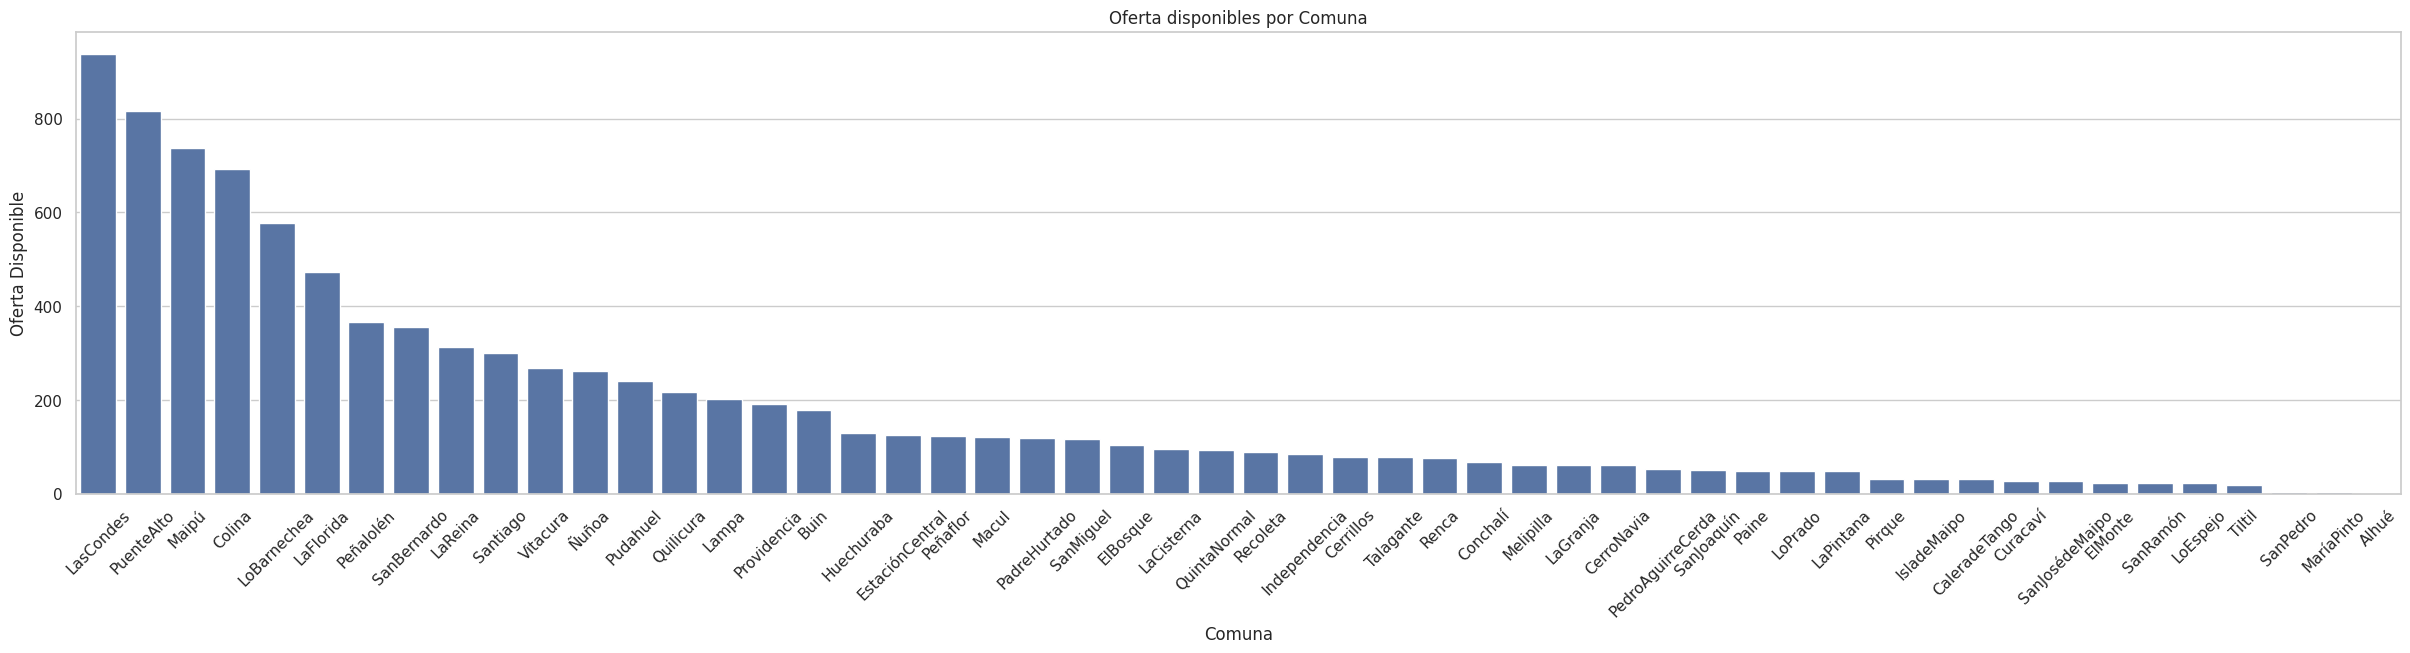

In [ ]:
conteo_comunas = df['Comuna'].value_counts()
plt.figure(figsize=(30,6))
sns.barplot(x=conteo_comunas.index, y=conteo_comunas.values)
plt.xlabel('Comuna')
plt.ylabel('Oferta Disponible')
plt.title('Oferta disponibles por Comuna')
plt.xticks(rotation=45)
plt.show()

**GRF 2.- Visialización de Provincias con mayor oferta en el mercado**
* Este grafico nos demuestra que la mayor cantidad de oferta esta localiza en el centro de la Region Metropolitana, estas al estar en el centro de la ciudad y con mayor acceso a Supermercados, hospitales, Centro Comerciales y Acceso a la entretención es donde se focaliza la oferta de mercado.

<ipython-input-598-65b4eb5aa57d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_provincia.index, y=conteo_provincia.values, palette = 'tab10')


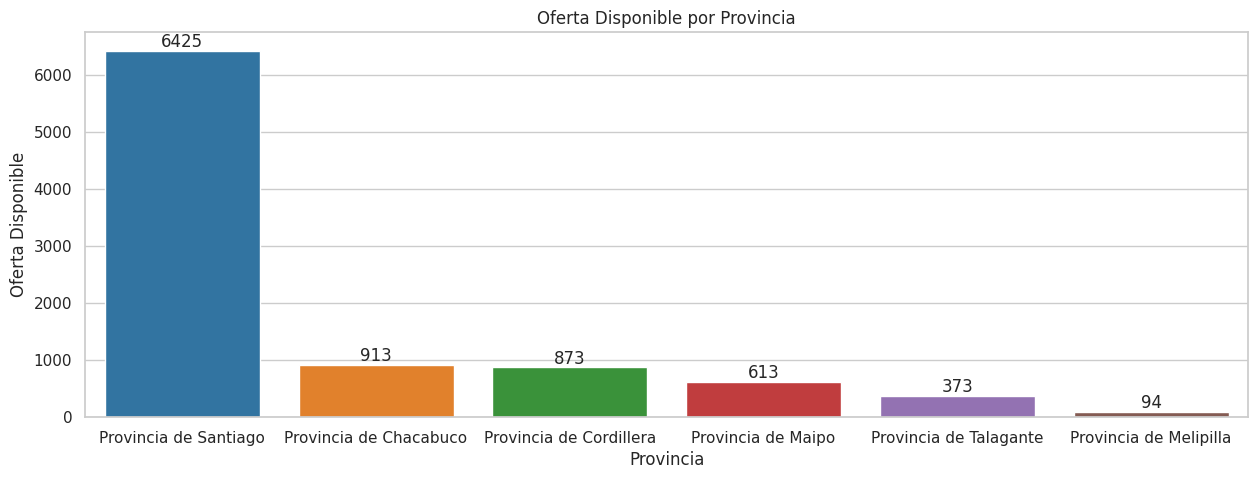

In [ ]:
conteo_provincia = df['Provincia'].value_counts()
plt.subplots(figsize=(15, 5))
sns.barplot(x=conteo_provincia.index, y=conteo_provincia.values, palette = 'tab10')
for i, value in enumerate(conteo_provincia.values):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.xlabel('Provincia')
plt.ylabel('Oferta Disponible')
plt.title('Oferta Disponible por Provincia')
plt.show()

In [ ]:
conteo_provincia = df['Provincia'].value_counts()
print(conteo_provincia)

Provincia
Provincia de Santiago      6425
Provincia de Chacabuco      913
Provincia de Cordillera     873
Provincia de Maipo          613
Provincia de Talagante      373
Provincia de Melipilla       94
Name: count, dtype: int64


In [ ]:
provincia_seleccionada = 'Provincia de Santiago'
comunas_en_provincia = df[df['Provincia'] == provincia_seleccionada]['Comuna'].unique()
cantidad_comunas = len(comunas_en_provincia)
print(f"Cantidad de comunas en la Provincia de {provincia_seleccionada}: {cantidad_comunas}")
print(f"Listado de comunas en la Provincia de {provincia_seleccionada}:")
print(comunas_en_provincia)
#for comuna in comunas_en_provincia:
#    print(f"- {comuna}")

Cantidad de comunas en la Provincia de Provincia de Santiago: 32
Listado de comunas en la Provincia de Provincia de Santiago:
['QuintaNormal' 'SanJoaquín' 'Maipú' 'Independencia' 'SanMiguel'
 'Pudahuel' 'Santiago' 'LaFlorida' 'Peñalolén' 'LasCondes' 'Quilicura'
 'LoPrado' 'LaGranja' 'Renca' 'LaReina' 'CerroNavia' 'Recoleta'
 'Providencia' 'LoBarnechea' 'Macul' 'ElBosque' 'Conchalí'
 'EstaciónCentral' 'LaCisterna' 'PedroAguirreCerda' 'SanRamón' 'Ñuñoa'
 'Vitacura' 'Cerrillos' 'LaPintana' 'Huechuraba' 'LoEspejo']


**GRF 3.- Variación de Precio (USD) Según Provincia**
* Estos graficos nos hacen una vista aluciba de como se comporta el precio de viviendads en el mercado, segun su ubicación estrategica (Provincias).
* Dentro de analisis podemos observar que la Provincia de Santiago es la que cuenta con el precio (En USD) mas elevado del mercado. y la Provincia del Maipo es la que tiene menor costo.
* *Observación: Los montos en Dolares se encuentran en Miles (/1000)*

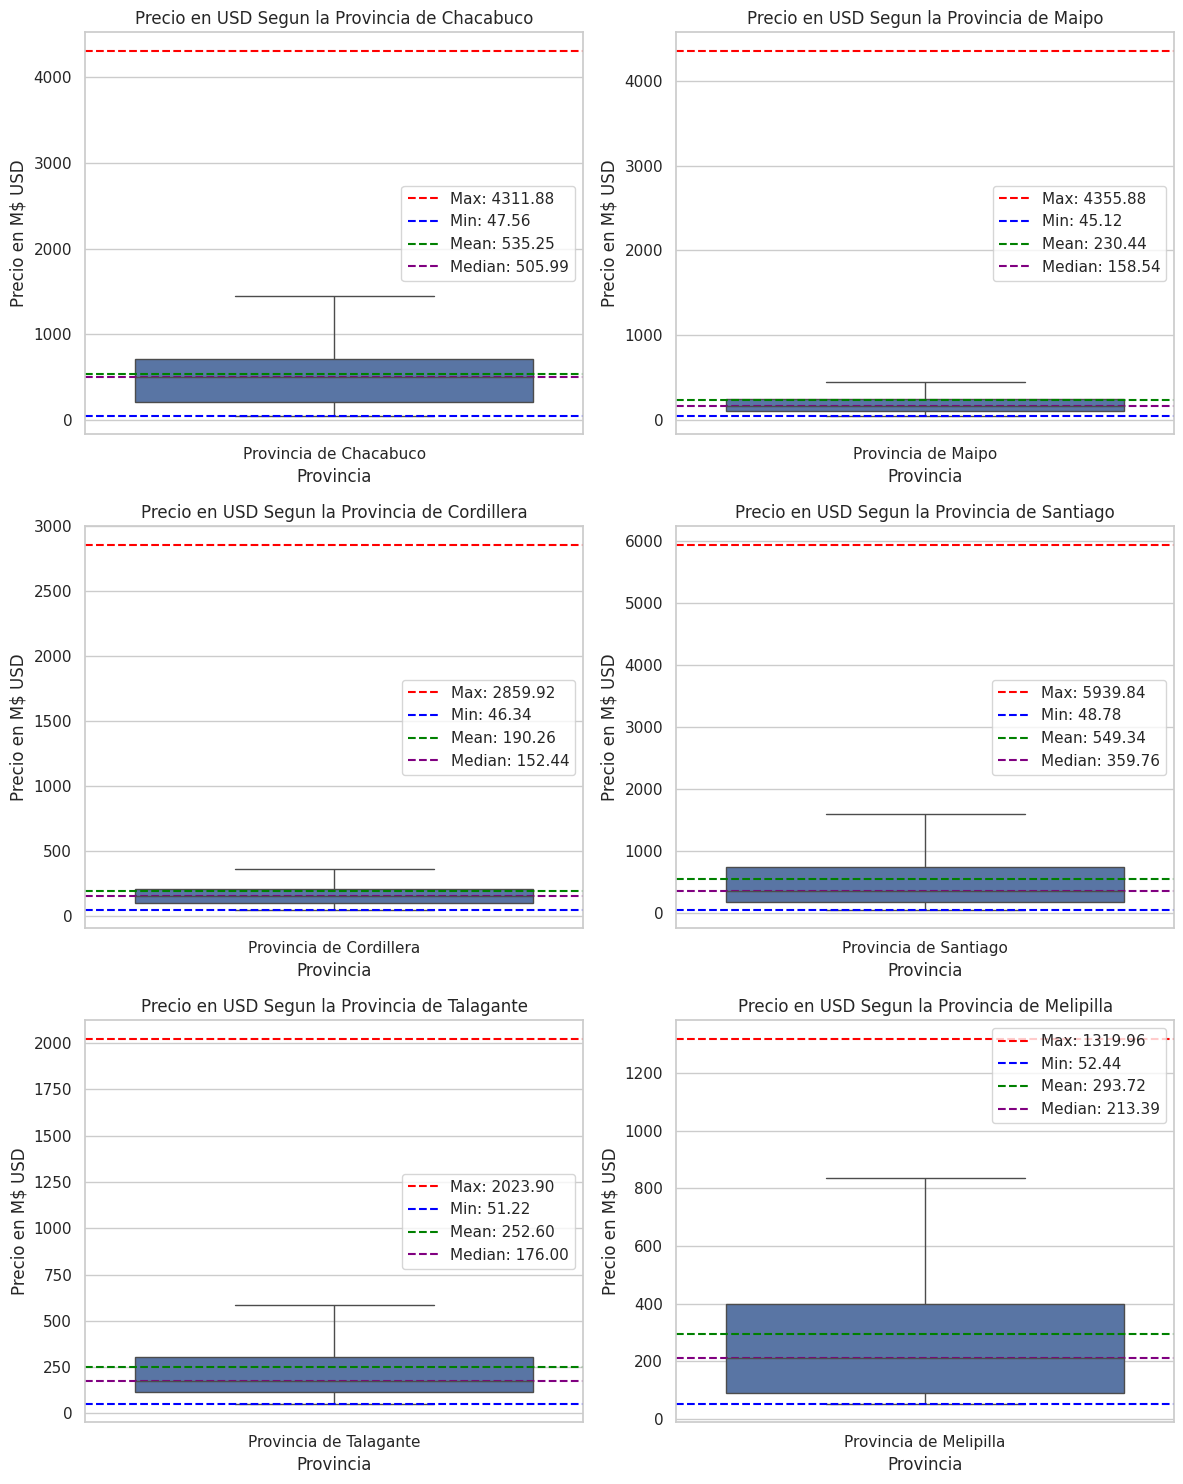

In [ ]:
provincias_unicas = df['Provincia'].unique()
fig, axs = plt.subplots(3, 2, figsize=(12, 15))
axs = axs.flatten()
for i, provincia in enumerate(provincias_unicas):
    datos_provincia = df[df['Provincia'] == provincia]
    estadisticos = datos_provincia['Price_USD'].agg(['max', 'min', 'mean', 'median'])
    sns.boxplot(x=datos_provincia['Provincia'] ,y=datos_provincia['Price_USD'], showfliers=False, ax=axs[i])
    axs[i].axhline(estadisticos['max'], color='red', linestyle='--', label=f'Max: {estadisticos["max"]:.2f}')
    axs[i].axhline(estadisticos['min'], color='blue', linestyle='--', label=f'Min: {estadisticos["min"]:.2f}')
    axs[i].axhline(estadisticos['mean'], color='green', linestyle='--', label=f'Mean: {estadisticos["mean"]:.2f}')
    axs[i].axhline(estadisticos['median'], color='purple', linestyle='--', label=f'Median: {estadisticos["median"]:.2f}')


    axs[i].set_title(f'Precio en USD Segun la {provincia}')
    axs[i].set_ylabel('Precio en M$ USD')
    axs[i].legend()

plt.tight_layout()
plt.show()

**GRF 4.- DISPERCION EN RELACION ENTRE PRECIO Y DORMITORIOS**
* Podemos demostrar que si la vivienda tiene cuenta con mas dormitorios disponibles, su valor tiende a aumentar.
* El datos fuera de rango que estan sobre los 11 dormitorios pueden corresponder a hoteles, esto por su bajo valor, lo cual incluso puede ser un arriendo disponible.
* *Observación: Los montos en Dolares se encuentran en Miles (/1000)*

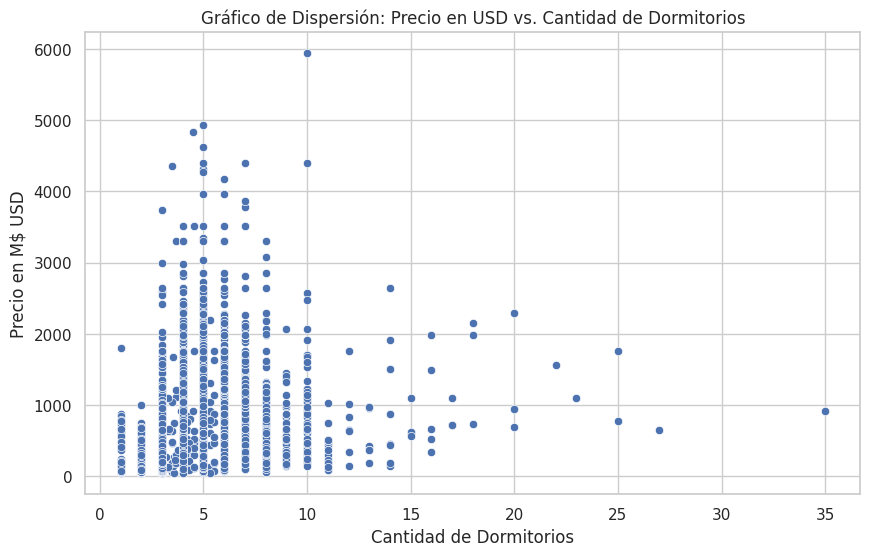

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dorms', y='Price_USD', data=df)
plt.title('Gráfico de Dispersión: Precio en USD vs. Cantidad de Dormitorios')
plt.xlabel('Cantidad de Dormitorios')
plt.ylabel('Precio en M$ USD')
plt.show()

**GRF 5.- HISTOGRAMA DE FRECUENCIA**
* El gráfico permite visualizar la distribución de precios de las propiedades en diferentes provincias. Puedes identificar cuál provincia tiene más propiedades a un rango de precio específico.
* *Observación: Los montos en Dolares se encuentran en Miles (/1000)*

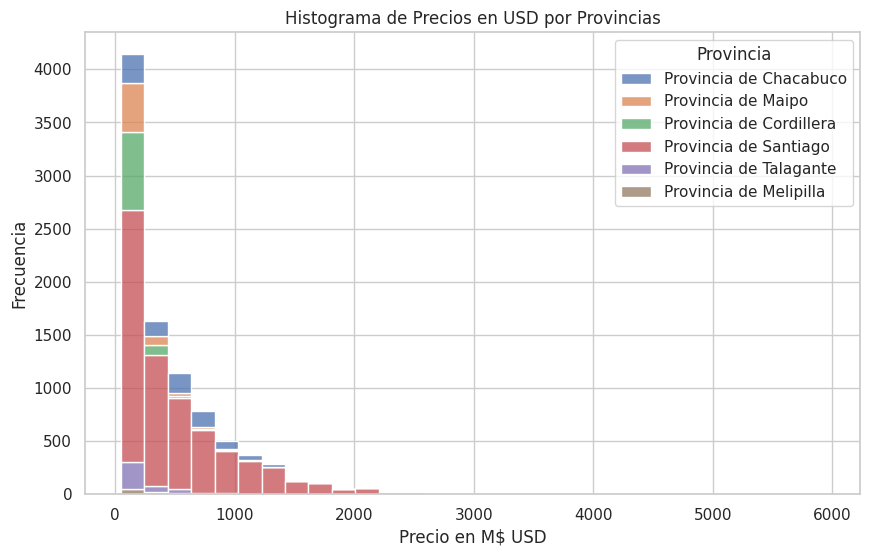

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price_USD',hue='Provincia', multiple='stack', bins=30)
plt.title('Histograma de Precios en USD por Provincias')
plt.xlabel('Precio en M$ USD')
plt.ylabel('Frecuencia')
plt.show()

**GRF 6.- GRAFICO DE CAJAS RELACION PRECIO PROVINCIA**
* Este gráfico permite comparar los precios de las propiedades en diferentes provincias. Los gráficos de caja muestran la mediana, cuartiles y posibles valores atípicos, ofreciendo una visualización clara de la variabilidad de precios entre las provincias.
* Este grafico al igual que el anterior nos muestra aquellos valores que estan fuera de rango, segun su provincia , entregandonos una alerta del DataSet, ya que este puede contener datos mal cargados en sistemas o que esten colocando viviendas sobre el precio de mercado.
* *Observación: Los montos en Dolares se encuentran en Miles (/1000)*


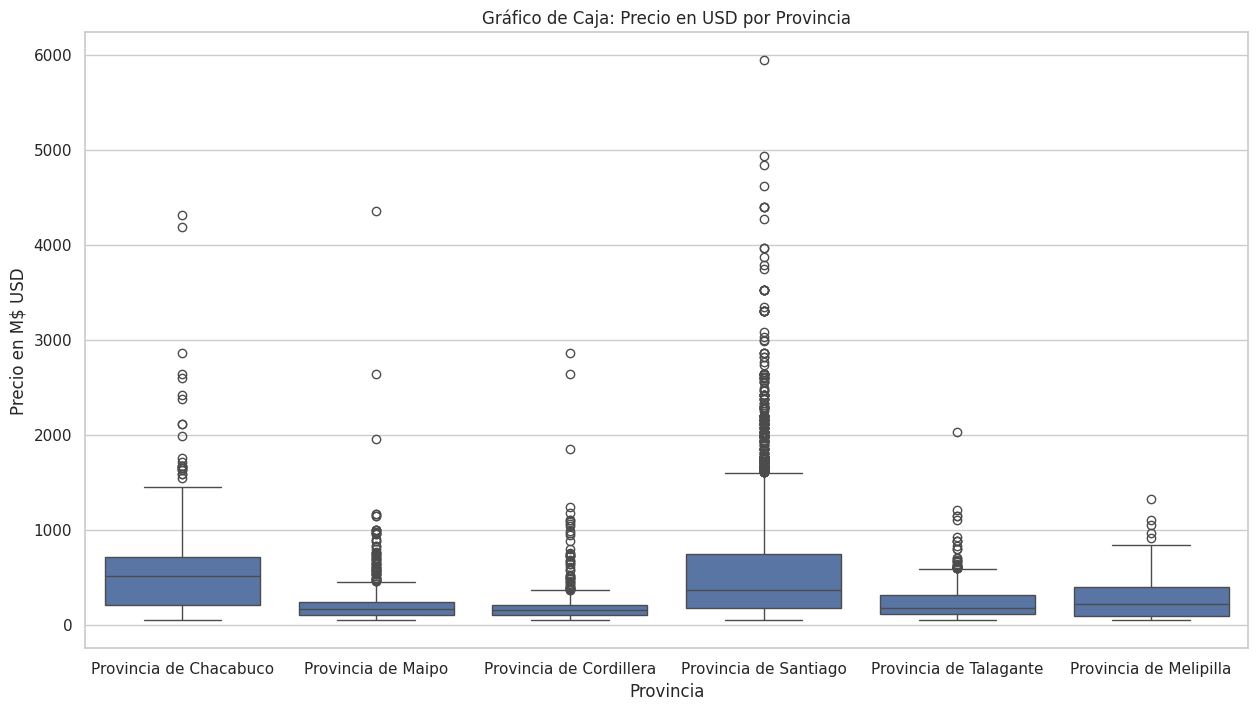

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Provincia', y='Price_USD', data=df)
plt.title('Gráfico de Caja: Precio en USD por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Precio en M$ USD')
plt.show()